<a href="https://colab.research.google.com/github/gmauricio-toledo/NLP-MCD/blob/main/11-DocumentEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Embeddings</h1>

En esta notebook exploraremos una técnica útil para combinar embeddings de palabras para formar representaciones vectoriales de documentos. Esto lo haremos mediante el uso de redes neuronales.

In [ ]:
import nltk
import pandas as pd
import numpy as np
from nltk import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from string import punctuation

nltk.download('punkt')
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def normalizar_vector(v):
    if np.linalg.norm(v) == 0:
        return v
    else:
        return v / np.linalg.norm(v)

# Un ejemplo de uso

## El corpus

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

### Corpus 1: 20NewsGroups

In [ ]:
from sklearn.datasets import fetch_20newsgroups

train_data = fetch_20newsgroups(subset='train',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball'],
                                random_state=642
                                )
test_data = fetch_20newsgroups(subset='test',
                                remove=('headers', 'footers', 'quotes'),
                                categories=['sci.space', 'rec.sport.baseball'],
                                random_state=642
                               )

X_train_raw = train_data.data
y_train = train_data.target

X_test_raw = test_data.data
y_test = test_data.target

In [ ]:
X_train_raw = [re.sub(r'\d+', ' ', doc) for doc in X_train_raw]
train_tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                        for doc in X_train_raw]
train_docs = [' '.join(doc) for doc in train_tokenized_docs]

X_test_raw = [re.sub(r'\d+', ' ', doc) for doc in X_test_raw]
test_tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                       for doc in X_test_raw]
test_docs = [' '.join(doc) for doc in test_tokenized_docs]

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stopwords)
X_train_tfidf = vectorizer.fit_transform(train_docs).toarray()
X_test_tfidf = vectorizer.transform(test_docs).toarray()

### Corpus 2: IMDB

In [ ]:
!gdown 18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf

Downloading...
From: https://drive.google.com/uc?id=18kGdlhOiQNS61wUK7uPbdquKL3XJrgzf
To: /content/IMDB.csv
100% 66.2M/66.2M [00:02<00:00, 32.2MB/s]


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

imdb_df = pd.read_csv('IMDB.csv')
display(imdb_df)

y = LabelEncoder().fit_transform(imdb_df['sentiment'].values)

X_train_raw, X_test_raw, y_train, y_test = train_test_split(imdb_df['review'].values, y, test_size=0.2, random_state=642)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


El preprocesamiento y limpieza tarda alrededor de 2 minutos

In [ ]:
X_train_raw = [re.sub(r'\d+', ' ', doc) for doc in X_train_raw]
train_tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                        for doc in X_train_raw]
train_docs = [' '.join(doc) for doc in train_tokenized_docs]

X_test_raw = [re.sub(r'\d+', ' ', doc) for doc in X_test_raw]
test_tokenized_docs = [[x for x in word_tokenize(doc) if x not in stopwords and x not in punctuation]
                       for doc in X_test_raw]
test_docs = [' '.join(doc) for doc in test_tokenized_docs]

In [ ]:
vectorizer = TfidfVectorizer(max_features=2000, stop_words=stopwords)
X_train_tfidf = vectorizer.fit_transform(train_docs).toarray()
X_test_tfidf = vectorizer.transform(test_docs).toarray()

## Combinamos embeddings con una red neuronal

* 20NG:
* IMDB: 1 minuto

In [ ]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=train_tokenized_docs, vector_size=100, window=5, min_count=5, workers=4)

In [84]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Dropout, InputLayer
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Tokenizamos y creamos las secuencias con padding

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(X_train_raw)
sequences = tokenizer.texts_to_sequences(X_train_raw)
X_train = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=50)

test_sequences = tokenizer.texts_to_sequences(X_test_raw)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=50)

Veamos un ejemplo:

In [90]:
sample_text = "good movie, but bad acting"
# sample_text = "Was so looking forward to this film even book my ticket in advance as I really enjoy this reboot series. However this one is really disappointing! While the cinematography and AI is absolutely phenomenal, the lead characters have far too human traits! And the human lead character, very disappointing & unbelievable, the casting of Freya Allan is really hammy, they obviously needed a Gen Z in the film. Too many holes in the plot, they filled up the film with stuff & missed opportunities to explore some scenarios in more depth. There was a great opportunity to give a nod to the original, when they were walking along the beach which they missed, (guess what I'm thinking)?. Perhaps it would have been better with a more focused storyline."

print(sample_text)
sample_sequence = tokenizer.texts_to_sequences([sample_text])
print(sample_sequence)
print(pad_sequences(sample_sequence, maxlen=50, padding='post'))

good movie, but bad acting
[[49, 17, 18, 74, 113]]
[[ 49  17  18  74 113   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


Creamos la matriz de embeddings

In [ ]:
embedding_dim = w2v_model.wv.vector_size
vocab_size = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in w2v_model.wv.index_to_key:
            embedding_matrix[i] = w2v_model.wv[word]

Observemos que las dimensiones de todo son congruentes

In [ ]:
embedding_matrix.shape, vocab_size, embedding_dim, vocab_size*embedding_dim

((110104, 100), 110104, 100, 11010400)

Definimos el modelo

In [79]:
model = Sequential()

# La capa que recibe las secuencias
model.add(InputLayer(input_shape=(50,)))

# La capa de embeddings
embedding_layer = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            trainable=True)
embedding_layer.build((1,))
embedding_layer.set_weights([embedding_matrix])

print(embedding_layer.get_weights()[0].shape)

model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


(110104, 100)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_30 (Embedding)             │ (None, 50, 100)             │      11,010,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 5000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 25)                  │         125,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,135,451 (42.48 MB)

 Trainable params: 11,135,451 (42.48 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [81]:
history = model.fit(X_train, y_train, epochs=7, batch_size=32,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 396s 351ms/step - accuracy: 0.6669 - loss: 0.6079 - val_accuracy: 0.7785 - val_loss: 0.4656
Epoch 2/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 421s 333ms/step - accuracy: 0.8302 - loss: 0.3801 - val_accuracy: 0.7977 - val_loss: 0.4522
Epoch 3/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 223s 199ms/step - accuracy: 0.8928 - loss: 0.2605 - val_accuracy: 0.7840 - val_loss: 0.5173
Epoch 4/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 242s 181ms/step - accuracy: 0.9406 - loss: 0.1562 - val_accuracy: 0.7828 - val_loss: 0.6092
Epoch 5/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 272s 189ms/step - accuracy: 0.9719 - loss: 0.0785 - val_accuracy: 0.7695 - val_loss: 0.8731
Epoch 6/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 257s 185ms/step - accuracy: 0.9864 - loss: 0.0375 - val_accuracy: 0.7738 - val_loss: 1.0375
Epoch 7/7
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 270s 192ms/step - accuracy: 0.9895 - loss: 0.0271 - val_accuracy: 0.7732 - val_loss: 1.2557


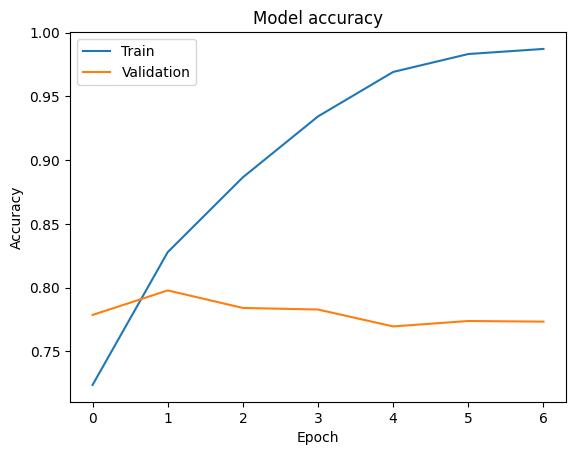

In [82]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [83]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7734 - loss: 1.2278


[1.2225009202957153, 0.7763000130653381]